In [107]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.models as models
import numpy as np 


In [108]:
model_path = "/home/ruijingyang/cytotox/eda_phase/models/resnet50_merged3channels/resnet50_50.pt"
# "/home/ruijingyang/cytotox/eda_phase/models/resnet50_merged3channels/resnet50_50.pt"
model = models.resnet50(pretrained=False, num_classes=2)
model.load_state_dict(torch.load(model_path))


/opt/conda/envs/cyto/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/envs/cyto/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


<All keys matched successfully>

In [109]:
model = torch.nn.Sequential(*list(model.children())[:-2], model.avgpool, torch.nn.Flatten())
print(model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [110]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [111]:
model.to(device)
model.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [112]:
data_path = "/home/ruijingyang/cytotox/eda_phase/data/train_data_concentrateA_norm_m3"

In [113]:
transform = transforms.Compose([
    # transforms.Grayscale(num_output_channels=3),  # 将单通道转换为三通道
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [114]:
# dataset = ImageFolder(data_path, transform=transform)
# # print(len(dataset))
# # print(dataset.classes)

# dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# with torch.no_grad():
#     for inputs, labels in dataloader:
#         inputs = inputs.to(device)
#         labels = labels.to(device)
        
#         features = model(inputs)

        
#         np_features = features.detach().cpu().numpy()
#         print(np_features.shape)
#         break

In [115]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from numpy.linalg import norm
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import os
from pathlib import Path 
from sklearn.preprocessing import StandardScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage, TextArea

In [116]:
def fearure_extraction(img,model):
    with torch.no_grad():
        inputs = transform(img).unsqueeze(0).to(device)
        # print(inputs.shape)
        features = model(inputs)        
        np_features = features.detach().cpu().numpy()
        # print(np_features.shape)
    normalized_features = np_features[0] / norm(np_features[0])
    return normalized_features

In [117]:
file_path = "/home/ruijingyang/cytotox/eda_phase/data/feature_similarity_visual"
#'/home/ruijingyang/cytotox/eda_phase/data/feature_similarity_visual_B_usingA'
file_names = os.listdir(file_path)

In [118]:
feature_list = []
labels = []
for file_name in file_names:
    label = Path(file_name).stem[-1]
    print(label)
    labels.append(label)
    image = Image.open(os.path.join(file_path, file_name))
    feature_list.append(fearure_extraction(image,model))

1
0
0
0
1
1
1
0
0
1


In [119]:
feature_list

[array([0.03418264, 0.01485803, 0.03861551, ..., 0.00456164, 0.00681631,
        0.04084032], dtype=float32),
 array([0.05173153, 0.02443983, 0.02996266, ..., 0.0060997 , 0.006403  ,
        0.02930081], dtype=float32),
 array([0.03847016, 0.02763258, 0.02771222, ..., 0.00922986, 0.00718066,
        0.02946255], dtype=float32),
 array([0.03302526, 0.0146412 , 0.03575648, ..., 0.02703707, 0.00399944,
        0.02618316], dtype=float32),
 array([0.03592881, 0.02859655, 0.02412191, ..., 0.0335165 , 0.04132405,
        0.00384002], dtype=float32),
 array([0.03451296, 0.03600451, 0.02914651, ..., 0.00927047, 0.03096287,
        0.02785441], dtype=float32),
 array([0.03543572, 0.02515696, 0.00993995, ..., 0.01561742, 0.02606481,
        0.00594363], dtype=float32),
 array([0.04373033, 0.00610972, 0.04624091, ..., 0.00669411, 0.00874294,
        0.03312141], dtype=float32),
 array([0.03501641, 0.03595005, 0.02921312, ..., 0.00613026, 0.02209946,
        0.01929427], dtype=float32),
 array([0.

In [120]:
labels

['1', '0', '0', '0', '1', '1', '1', '0', '0', '1']

In [121]:
features_np = np.vstack(feature_list)
features_np.shape

(10, 2048)

In [122]:
len(features_np)

10

In [123]:
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features_np)

# # 应用t-SNE
# perplexity_value = len(features_np) // 2 
# tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
# features_reduced = tsne.fit_transform(features_scaled)

# # 绘制t-SNE图
# plt.figure(figsize=(10, 8))
# for label in np.unique(labels):
#     idx = np.where(labels == label)
#     plt.scatter(features_reduced[idx, 0], features_reduced[idx, 1], label=label, alpha=0.7, edgecolors='w', s=90)

# plt.legend()
# plt.title('t-SNE of Cell Images')
# plt.xlabel('t-SNE Feature 1')
# plt.ylabel('t-SNE Feature 2')
# plt.show()

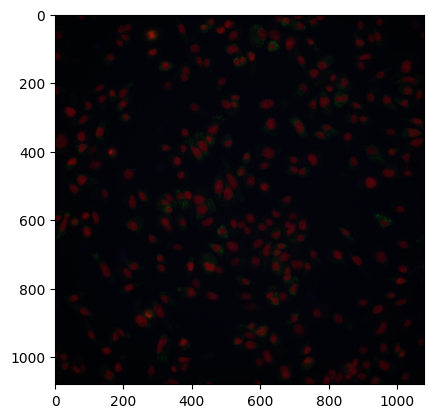

In [124]:
neighbors = NearestNeighbors(n_neighbors=2, algorithm='brute',metric='euclidean').fit(feature_list)
distances, indices = neighbors.kneighbors([feature_list[0]])

plt.imshow(mpimg.imread(os.path.join(file_path, file_names[0])))

In [125]:
indices[0]

array([0, 1])

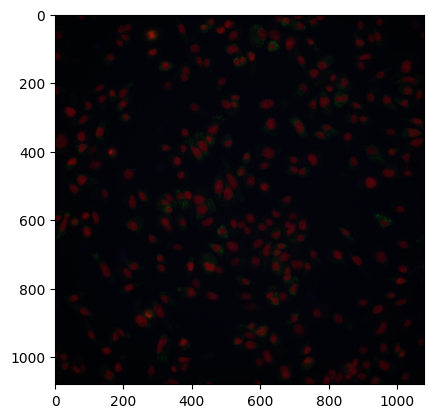

In [126]:
plt.imshow(mpimg.imread(os.path.join(file_path, file_names[indices[0][0]])))

In [127]:
def plot_similar_images(image_paths,distances):
    og_image_path = mpimg.imread(image_paths[0])
    similar_images = []    
    similar_images.append(og_image_path)
    for path in image_paths[1]:
        similar_images.append(mpimg.imread(path))
    plt.figure(figsize=(20,10))
    columns = 5
    for i , image in enumerate(similar_images):
        ax = plt.subplot(1,columns,i+1)
        if i==0:
            ax.set_title('Original Image')
        else:
            ax.set_title(f'Similar Image : {i} Distance : {distances[i]:.2f}')
        plt.imshow(image)

In [128]:
# for i in range(6):
#     random_image_index = random.randint(0,sample_images)
#     distances, indices = neighbors.kneighbors([feature_list[random_image_index]])
#     image_paths = (file_names[random_image_index],[file_names[indices[0][j]] for j in range(1,5)])
#     plot_similar_images(image_paths,distances[0])
    

In [129]:
num_feature_dimensions=10

pca = PCA(n_components = num_feature_dimensions)
pca.fit(feature_list)

feature_list_compressed = pca.transform(feature_list)

selected_features = feature_list_compressed
selected_filenames = [os.path.join(file_path, f) for f in file_names]
perplexity_value = len(features_np) // 2 
tsne_results = TSNE(n_components=2,perplexity=perplexity_value,verbose=1,metric='euclidean').fit_transform(selected_features)

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.001s...
[t-SNE] Computed neighbors for 10 samples in 0.091s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 0.258972
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.339676
[t-SNE] KL divergence after 1000 iterations: 0.054031


In [164]:
def plot_images_in_2d(x, y, image_paths, axis=None, zoom=1):
    x, y = np.atleast_1d(x, y)
    for x0, y0, image_path in zip(x, y, image_paths):
        image = Image.open(image_path)
        label = Path(image_path).stem[:6]+ '-'+ Path(image_path).stem[-1]
        # print(label)
        image.thumbnail((300, 300), Image.LANCZOS)
        img = OffsetImage(image, zoom=zoom)
        anno_box = AnnotationBbox(img, (x0, y0),
                                  xycoords='data',
                                  frameon=False)
        
        axis.add_artist(anno_box)
        # Add a text annotation for each image
        axis.annotate(label, (x0, y0 + 3), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12)

    axis.update_datalim(np.column_stack([x, y]))
    axis.autoscale()

In [167]:
def show_tsne(x, y, selected_filenames):
    fig, axis = plt.subplots()
    fig.set_size_inches(28, 28, forward=True)
    plot_images_in_2d(x, y, selected_filenames, zoom=0.6, axis=axis)
    plt.tight_layout()
    plt.savefig('visual_on_Arow.png', dpi=300)
    plt.show()

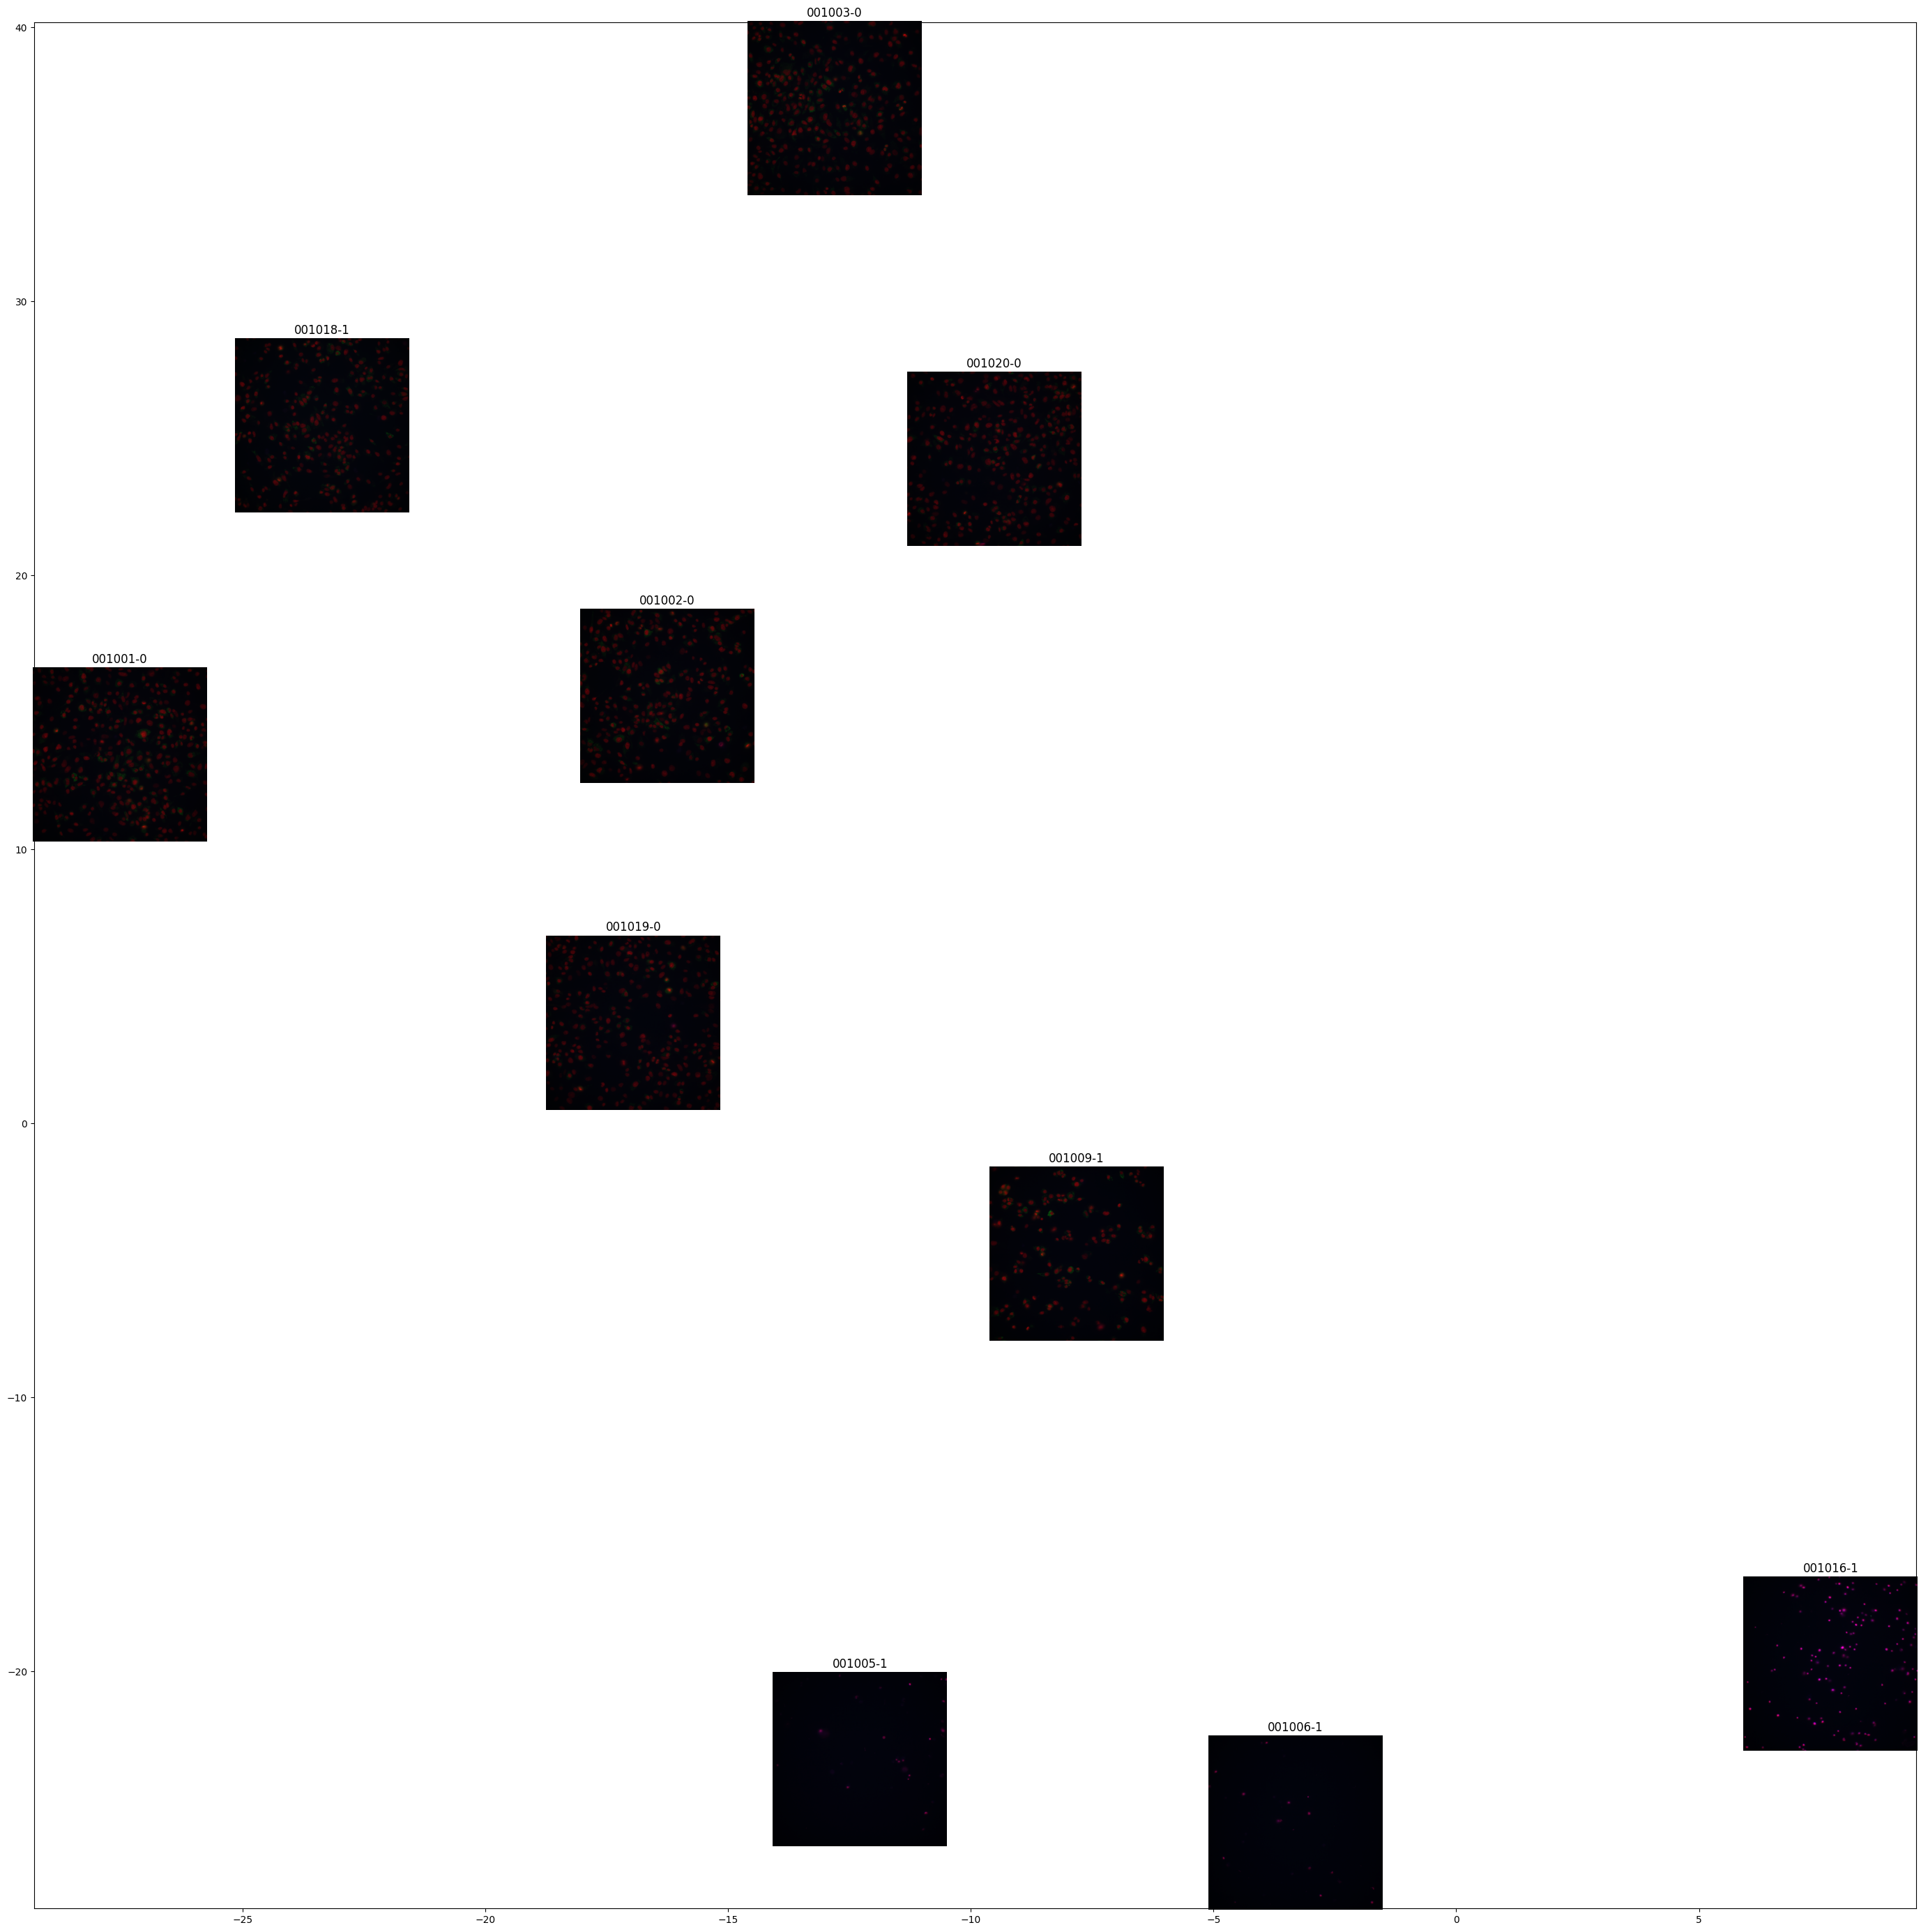

In [168]:
show_tsne(tsne_results[:, 0], tsne_results[:, 1], selected_filenames)

In [ ]:
def convert_tiff_to_png(tiff_path, png_path):
    for image_name in os.listdir(tiff_path):
        image_path = os.path.join(tiff_path, image_name)
        png_save_path = os.path.join(png_path, Path(image_name).stem + ".png")
        # 使用Pillow加载TIFF文件
        with Image.open(image_path) as img:
            # 将图像转换为'RGB'模式以确保兼容性
            img = img.convert('RGB')
            # 保存图像为PNG格式
            img.save(png_save_path, 'PNG')





In [ ]:
# 指定TIFF文件路径和输出PNG文件路径
tiff_path = '/home/ruijingyang/cytotox/eda_phase/data/feature_similarity_visual'
png_path = '/home/ruijingyang/cytotox/eda_phase/data/feature_similarity_visual_png'
# 调用函数进行转换
convert_tiff_to_png(tiff_path, png_path)

In [133]:
def tsne_to_grid_plotter_manual(x, y, selected_filenames):
    S = 2000
    s = 100
    x = (x - min(x)) / (max(x) - min(x))
    y = (y - min(y)) / (max(y) - min(y))
    x_values = []
    y_values = []
    filename_plot = []
    x_y_dict = {}
    for i, image_path in enumerate(selected_filenames):
        a = np.ceil(x[i] * (S - s))
        b = np.ceil(y[i] * (S - s))
        a = int(a - np.mod(a, s))
        b = int(b - np.mod(b, s))
        if str(a) + "|" + str(b) in x_y_dict:
            continue
        x_y_dict[str(a) + "|" + str(b)] = 1
        x_values.append(a)
        y_values.append(b)
        filename_plot.append(image_path)
    fig, axis = plt.subplots()
    fig.set_size_inches(22, 22, forward=True)
    plot_images_in_2d(x_values, y_values, filename_plot, zoom=.58, axis=axis)
    plt.show()

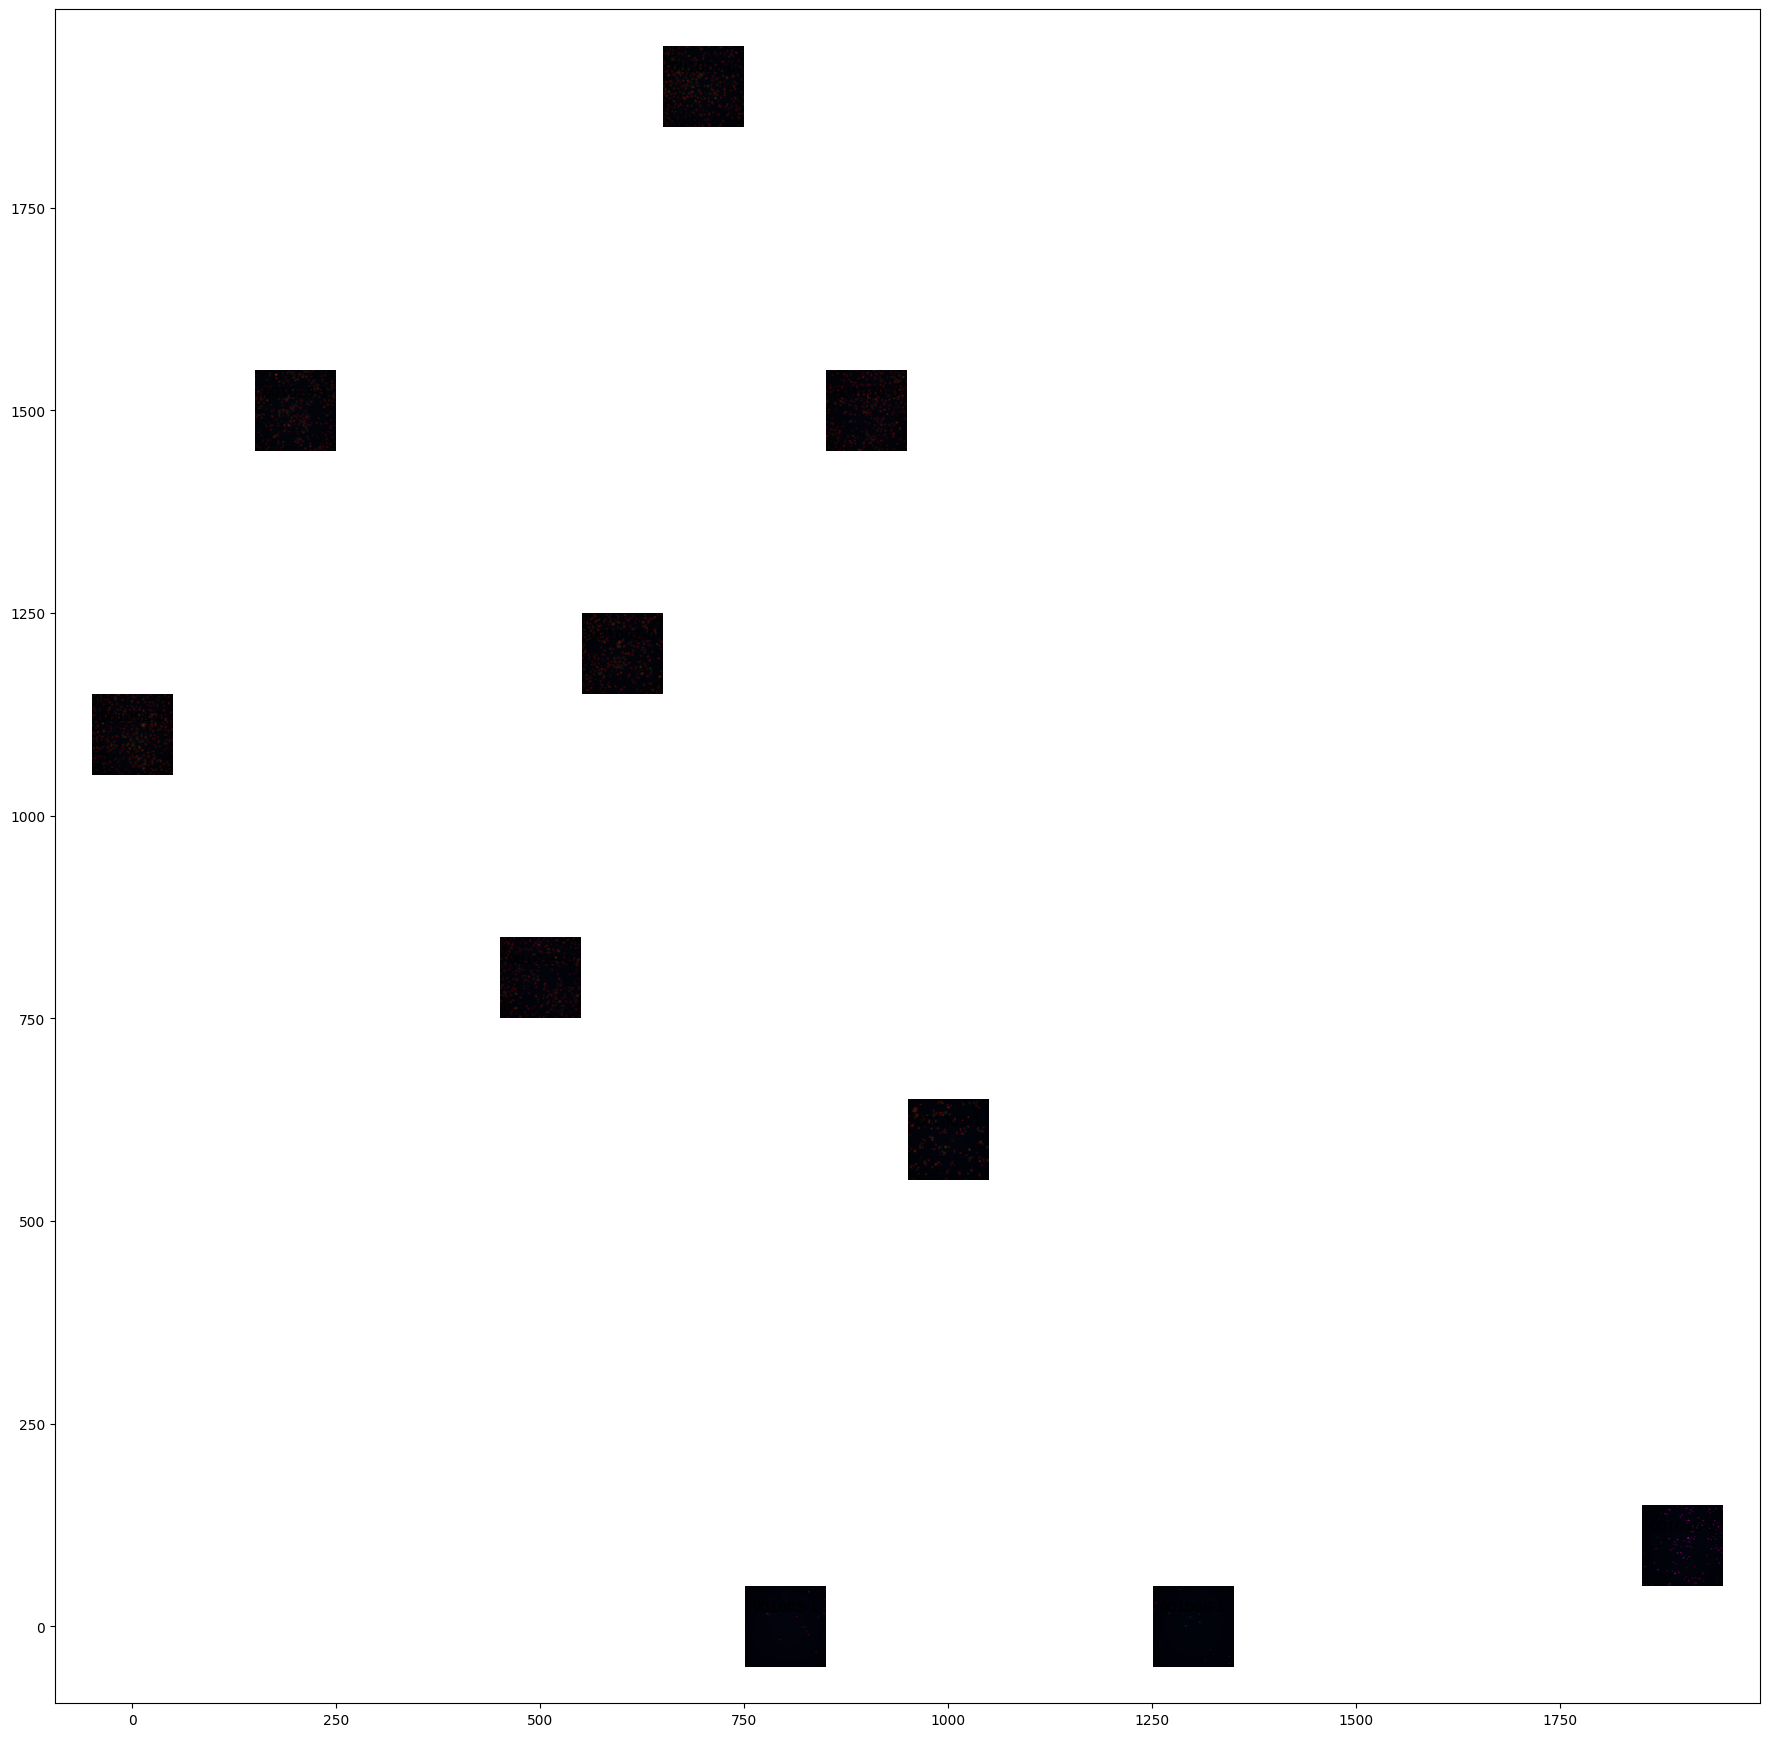

In [134]:
tsne_to_grid_plotter_manual(tsne_results[:, 0], tsne_results[:, 1],
                            selected_filenames)

In [135]:
# this is a hook (learned about it here: https://forums.fast.ai/t/how-to-find-similar-images-based-on-final-embedding-layer/16903/13)
# hooks are used for saving intermediate computations
class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
        self.features = None
    def hook_fn(self, module, input, output): 
        out = output.detach().cpu().numpy()
        if isinstance(self.features, type(None)):
            self.features = out
        else:
            self.features = np.row_stack((self.features, out))
    def remove(self): 
        self.hook.remove()
        

In [136]:

# sf = SaveFeatures(model.avgpool) ## Output before the last FC layer

In [137]:
# len(sf.features)